In [ ]:
#pip install requests
#pip install bs4
#! pip install beautifulsoup4

dos digitos 85
dos digitos 16
dos digitos 12
dos digitos 17
dos digitos 12
dos digitos 15
dos digitos 13
dos digitos 52
un digito 8
dos digitos 12
un digito 8
un digito 8
un digito 8
un digito 8
dos digitos 90
dos digitos 15
dos digitos 16
dos digitos 19
un digito 8
dos digitos 20
dos digitos 12
dos digitos 62
un digito 8
dos digitos 16
dos digitos 12
dos digitos 13
un digito 4
dos digitos 13
tres digitos 103
dos digitos 19
dos digitos 20
dos digitos 20
dos digitos 16
un digito 8
dos digitos 20
   Neurosis  Ansiedad  Ira  Depresión  Vergüenza  Falta de moderacion   
0        85        16   12         17         12                   15  \

   Vulnerabilidad  Extroversión  Cordialidad  Sociabilidad  ...  Cooperación   
0              13            52            8            12  ...           13  \

   Modestia  Empatía  Meticulosidad  Autoeficacia  Orden  Sentido del deber   
0         4       13            103            19     20                 20  \

   Orientación a objetivos  Disci

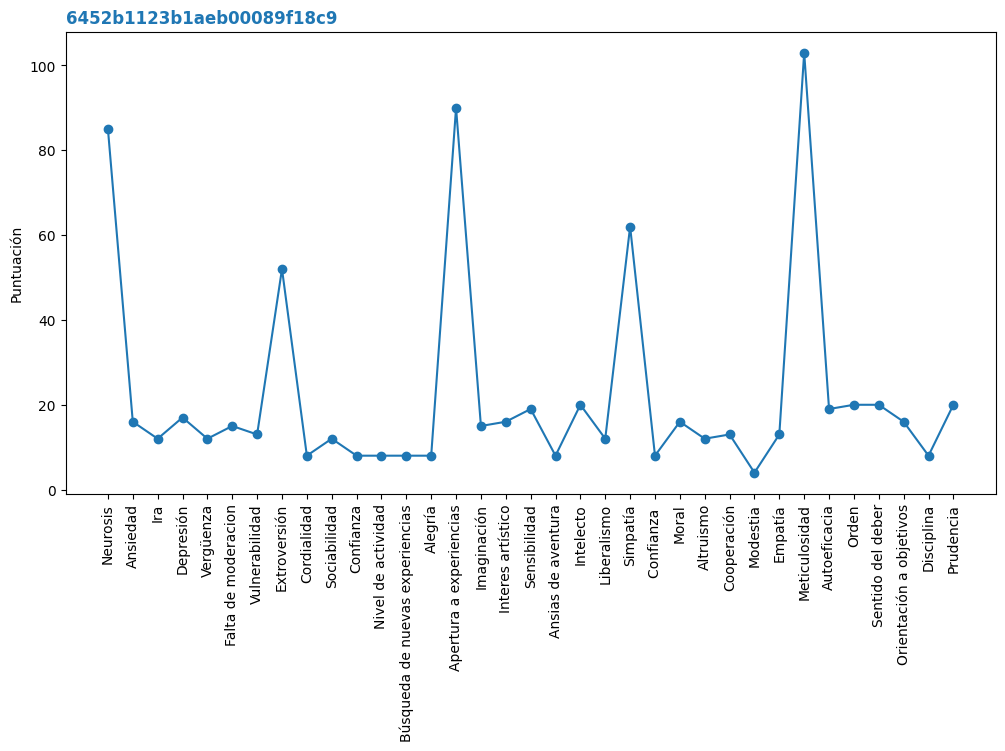

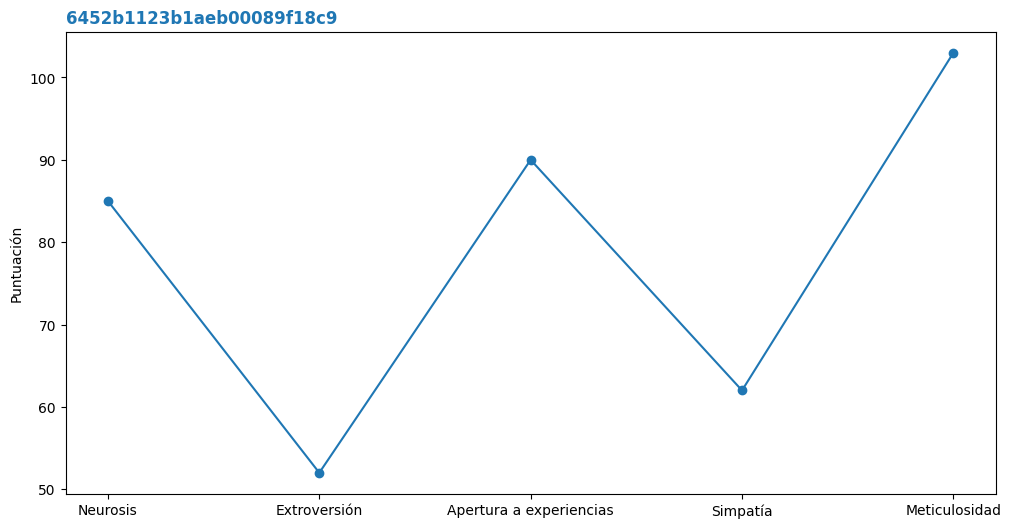

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt



# make a request to the website
url = "https://bigfive-test.com/result/6452b1123b1aeb00089f18c9"
response = requests.get(url)
identificador = url[32:]

# create a soup object from the response
soup = BeautifulSoup(response.content, "html.parser")

# define a list of attributes to extract
atributos = ["Neurosis", "Ansiedad", "Ira", "Depresión", "Vergüenza", 
              "Falta de moderacion", "Vulnerabilidad", "Extroversión", 
              "Cordialidad", "Sociabilidad", "Confianza", "Nivel de actividad", 
              "Búsqueda de nuevas experiencias", "Alegría", "Apertura a experiencias", 
              "Imaginación", "Interes artístico", "Sensibilidad", "Ansias de aventura", 
              "Intelecto", "Liberalismo", "Simpatía", "Confianza", "Moral", "Altruismo", 
              "Cooperación", "Modestia", "Empatía", "Meticulosidad", "Autoeficacia", 
              "Orden", "Sentido del deber", "Orientación a objetivos", "Disciplina", "Prudencia"]

# create an empty list to store the results
resultados = []

# loop over the attributes and extract the corresponding scores
for atributo in atributos:
    # find the corresponding div
    div = soup.find("a", {"href": f"#{atributo.lower()}"})
    # extract the score
    score = div.find_next('p').text.split(":")[1].strip()
    
    if score[3] == "-":
        score = int(score[:2])
    else:        
        if score[2] == "-":
            score = int(score[:1])
        else:
            score = int(score[:3])   
        
    # append the attribute name and score to the results list
    resultados.append(score)    

# create a pandas DataFrame from the results list

testPersonalidad = pd.DataFrame([resultados], columns=["Neurosis", "Ansiedad", "Ira", "Depresión", "Vergüenza", 
                                                        "Falta de moderacion", "Vulnerabilidad", "Extroversión", 
                                                        "Cordialidad", "Sociabilidad", "Confianza", "Nivel de actividad", 
                                                        "Búsqueda de nuevas experiencias", "Alegría", "Apertura a experiencias", 
                                                        "Imaginación", "Interes artístico", "Sensibilidad", "Ansias de aventura", 
                                                        "Intelecto", "Liberalismo", "Simpatía", "Confianza ", "Moral", "Altruismo", 
                                                        "Cooperación", "Modestia", "Empatía", "Meticulosidad", "Autoeficacia", 
                                                        "Orden", "Sentido del deber", "Orientación a objetivos", "Disciplina", "Prudencia"
                                                         ])
# print the DataFrame
print(testPersonalidad)


#Creando la grafica 
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(testPersonalidad.iloc[0], marker = 'o')
plt.xticks(rotation=90)
ax.set_title(identificador, loc = "left", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("Puntuación")
fig.savefig(identificador + " test personalidad todo.png")

columnas = ["Neurosis", "Extroversión", "Apertura a experiencias", "Simpatía", "Meticulosidad"]
datos = testPersonalidad[columnas]

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(datos.iloc[0], marker = 'o')
#datos.plot(ax=ax, kind="bar")
ax.set_title(identificador, loc="left", fontdict={"fontsize":12, "fontweight":"bold", "color":"tab:blue"})
ax.set_ylabel("Puntuación")
plt.xticks(rotation=0)
fig.savefig(identificador + " test personalidad 5.png")
